<a href="https://colab.research.google.com/github/hindesh-akash/ML_from_scratch/blob/main/LinReg_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [27]:
w1 = 4
w0 = 5
n = 200

X = 10*np.random.rand(n,) #initialising the feature vector

y = w0 + w1*X + np.random.rand(n,) 


In [28]:
def train_test_split(X,y):

    permutation = np.random.permutation(X.shape[0]) #Getting random indices to reduce bias
    test_size = int(len(permutation) * (0.8))
    X_train = X[permutation[:test_size]]
    X_test = X[permutation[test_size:]]
    y_train = y[permutation[:test_size]]
    y_test  = y[permutation[test_size:]]

    return (X_train, X_test, y_train, y_test)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

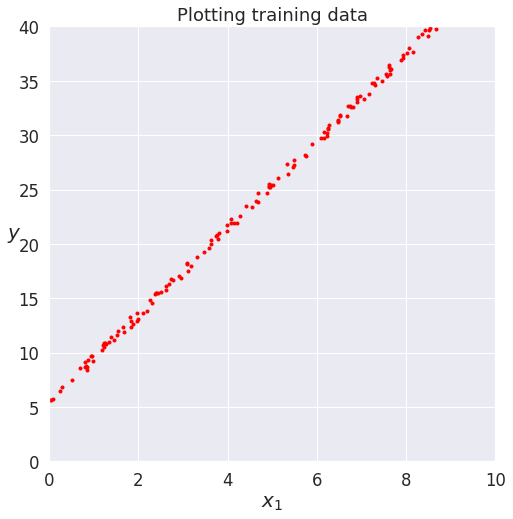

In [30]:
sns.set_style('darkgrid')
f = plt.figure(figsize=(8,8))
sns.set_context("notebook",font_scale=1.5,rc ={"lines.linewidth":2.5})

plt.plot(X_train,y_train,"r.")
plt.title("Plotting training data")
plt.grid(True)
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$",rotation=0,fontsize=20)
plt.axis([0,10,0,40])

plt.show()


In [31]:
X_test_wd = X_test
X_train_wd = X_train

In [32]:
def add_dummy_feature(x):

    return np.column_stack((np.ones(x.shape[0]),x))

X_train = add_dummy_feature(X_train)
X_test = add_dummy_feature(X_test)


In [33]:
X_train

array([[1.        , 0.9950658 ],
       [1.        , 1.87210029],
       [1.        , 8.99121391],
       [1.        , 6.90454124],
       [1.        , 3.19262089],
       [1.        , 8.16184185],
       [1.        , 3.79032535],
       [1.        , 1.2659383 ],
       [1.        , 6.17084193],
       [1.        , 4.5467008 ],
       [1.        , 0.81991198],
       [1.        , 9.12906253],
       [1.        , 6.51770943],
       [1.        , 0.87079568],
       [1.        , 6.89594985],
       [1.        , 5.46080497],
       [1.        , 2.44885353],
       [1.        , 7.88550467],
       [1.        , 8.83915999],
       [1.        , 4.88781332],
       [1.        , 9.35475455],
       [1.        , 1.2006907 ],
       [1.        , 3.08303991],
       [1.        , 0.09925175],
       [1.        , 0.69298827],
       [1.        , 4.93105746],
       [1.        , 4.08081871],
       [1.        , 6.77455285],
       [1.        , 6.74496855],
       [1.        , 6.48401828],
       [1.

In [34]:
def predict(X,w):

    #Check shape of X and w If X is (n*m) then w must be (m*1)

    assert (X.shape[-1]==w.shape[0])
    return np.dot(X,w)


In [35]:
w = np.random.rand(2,)
y_hat = predict(X_train,w)


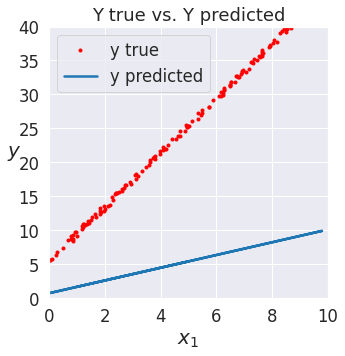

In [36]:
sns.set_style('darkgrid')
f = plt.figure(figsize=(5,5))
sns.set_context("notebook",font_scale=1.5,rc ={"lines.linewidth":2.5})

plt.plot(X_train_wd,y_train,"r.",label= "y true")
plt.plot(X_train_wd,y_hat,label="y predicted")
plt.title("Y true vs. Y predicted")
plt.grid(True)
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$",rotation=0,fontsize=20)
plt.axis([0,10,0,40])
plt.legend()

plt.show()

In [37]:
w

array([0.74594391, 0.93757679])

In [38]:
y_hat

array([1.67889451, 2.50118168, 9.17589738, 7.21948151, 3.73927115,
       8.39829738, 4.29966498, 1.93285827, 6.53158207, 5.00882504,
       1.51467435, 9.30514104, 6.85679699, 1.56238172, 7.21142643,
       5.86586789, 3.04193214, 8.13921005, 9.03333515, 5.32864422,
       9.51674464, 1.87168364, 3.63653057, 0.83900004, 1.39567362,
       5.36918893, 4.57202481, 7.09760741, 7.06986986, 6.82520895,
       3.46705573, 8.70466628, 2.32154068, 1.62847418, 2.79946498,
       0.96889878, 6.46574205, 5.36569049, 7.35821696, 3.65506793,
       1.2267453 , 7.7343353 , 5.56240294, 5.40218602, 9.11959374,
       6.99710143, 1.53837235, 7.13956697, 8.74478124, 2.91228898,
       7.89467895, 7.92577768, 9.82510459, 5.13803868, 3.51345117,
       6.61238284, 6.85432152, 8.18311384, 2.975623  , 1.65758154,
       4.69280171, 2.61229263, 5.89236386, 6.1164015 , 5.13401173,
       1.86106011, 9.08594131, 9.9226074 , 4.27044611, 3.26033269,
       8.49747396, 2.0084511 , 7.91214498, 4.24659309, 5.45590

In [39]:
def loss(X,y,w):

    e = predict(X,w) -y 

    return (1/2)*(e.T@e)


In [40]:
incurred_loss = loss(X_train,y_train,w)

In [41]:
incurred_loss

37371.86597066086

In [42]:
def normal_equation(X,y):

    w = np.linalg.pinv(X)@y

    return w

In [43]:
w_ne = normal_equation(X_train,y_train)

In [44]:
w_ne

array([5.54215054, 3.99408629])

In [49]:
test_loss = loss(X_test,y_test,w_ne)

In [50]:
test_loss

1.5020615240832738

In [47]:
y_hat = predict(X_test,w_ne)

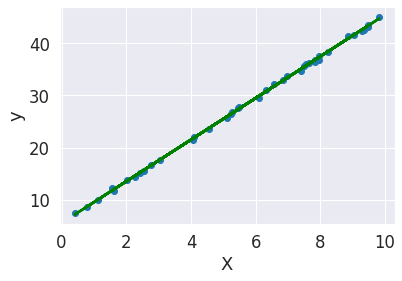

In [91]:
fig, ax = plt.subplots()

ax.scatter(X_test_wd,y_test)
ax.plot(X_test_wd,y_hat,color='green')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [52]:
def calculate_gradient(X,y,w):
    return np.transpose(X)@(predict(X,w)-y)

def update_weight(w,grad,lr):
    return (w-lr*grad)

def gradient_descent(X,y,lr,epochs):

    w = np.zeros(X.shape[1])
    for i in np.arange(0,epochs):
        dJdw = calculate_gradient(X,y,w)
        w = update_weight(w,dJdw,lr)

    return w

In [88]:
w_gd = gradient_descent(X_train,y_train,lr=0.00001,epochs=2500)

In [86]:
w_gd

array([5.50706742, 3.99948102])

In [75]:
def rmse(X,w,y):

    rmserror = np.sqrt((2*loss(X,w,y)/n)) # 2 is multiplied for the 1/2 factor in loss function

    return rmserror

In [89]:
gd_error = rmse(X_test,y_test,w_gd)
gd_error

0.3832361486054885

In [84]:
ne_error = rmse(X_test,y_test,w_ne)
ne_error

0.12255861961050613